In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

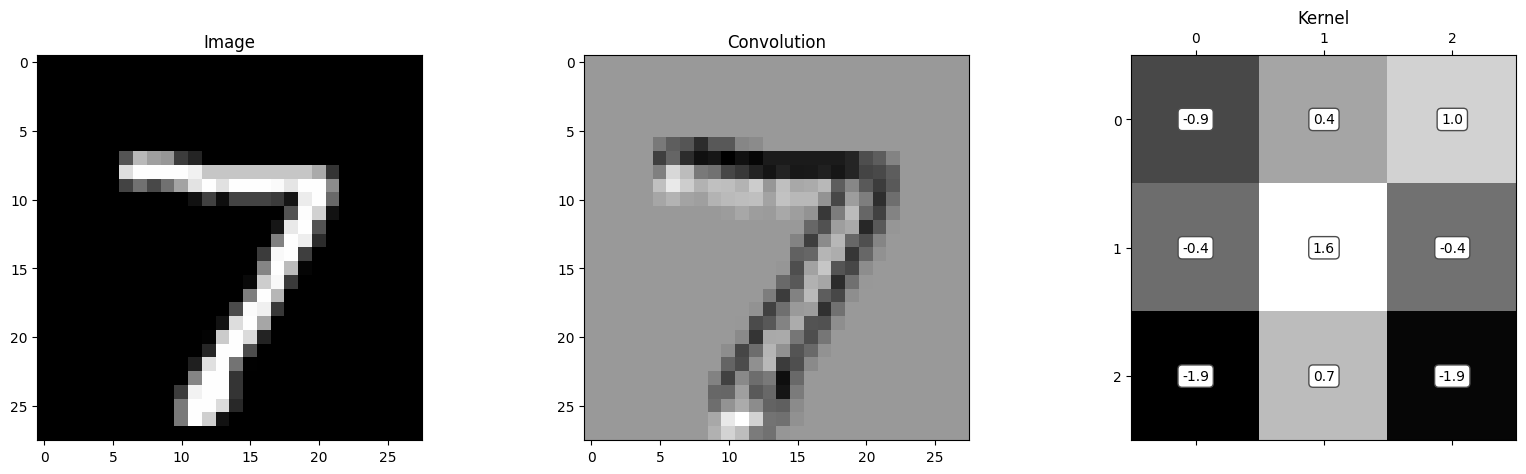

In [6]:
# Load a random image from MNIST
image = tf.keras.datasets.mnist.load_data()[1][0][0].reshape(1, 28, 28, 1).astype('float32')

# 3x3 random convolutional kernel
kernel = tf.random.normal([3, 3, 1, 1])

# Apply the convolutional kernel to the image
conv = tf.nn.conv2d(image, kernel, strides=1, padding='SAME')
# Normalize the output
conv = (conv - tf.reduce_min(conv)) / (tf.reduce_max(conv) - tf.reduce_min(conv))

# Plot the image and the convolution
# Plot the kernel as an image in grayscale and the kernel values
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].imshow(image[0, :, :, 0], cmap='gray')
ax[0].set_title('Image')
ax[1].imshow(conv[0, :, :, 0], cmap='gray')
ax[1].set_title('Convolution')
ax[2].matshow(kernel[:, :, 0, 0], cmap='gray')

for (i, j), z in np.ndenumerate(kernel[:, :, 0, 0]):
    ax[2].text(j, i, '{:0.1f}'.format(z), ha='center', va='center',
               bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))

ax[2].set_title('Kernel')
plt.show()

In [11]:
output_image = np.ones((1, 28, 28, 1))
current_kernel = np.zeros((3, 3, 1, 1))

os.makedirs(os.path.join(os.path.abspath(''),'conv_demo'), exist_ok=True)

for i in range(0, 28):
  for j in range(0, 28):
    output_image[0, i, j, 0] = conv[0, i, j, 0]
    for k in range(-1, 2):
      for l in range(-1, 2):
        if i + k >= 0 and i + k < 28 and j + l >= 0 and j + l < 28:
          current_kernel[k + 1, l + 1, 0, 0] = image[0, i + k, j + l, 0]
        else:
          current_kernel[k + 1, l + 1, 0, 0] = 0
    fig, ax = plt.subplots(1, 3, figsize=(20, 5))
    ax[0].imshow(image[0, :, :, 0], cmap='gray')
    ax[0].set_title('Image')
    ax[1].imshow(output_image[0, :, :, 0], cmap='gray', vmin=0, vmax=1)
    ax[1].set_title('Convolution')
    ax[2].matshow(current_kernel[:, :, 0, 0], cmap='gray', vmin=0, vmax=255)
    for (k, l), z in np.ndenumerate(current_kernel[:, :, 0, 0]):
      ax[2].text(l, k, '{:0.1f}'.format(z), ha='center', va='center',
                bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
    ax[2].set_title('Image Kernel')
    # Save the plot as a PNG image
    plt.savefig(f'conv_demo/convolution.{i * 28 + j}.png')
    plt.close()

In [13]:
# Generate gif
import imageio

images = os.listdir(os.path.join(os.path.abspath(''),'conv_demo'))

with imageio.get_writer('convolution.gif', mode='I') as writer:
  for filename in images:
    image = imageio.imread(os.path.join(os.path.abspath(''),'conv_demo', filename))
    writer.append_data(image)

C:\Users\dillo\AppData\Local\Temp\ipykernel_38936\1396395028.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(os.path.join(os.path.abspath(''),'conv_demo', filename))
